In [1]:
!wget https://raw.githubusercontent.com/BorutFlis/predictor/master/classifier_country.csv

--2020-12-18 10:53:14--  https://raw.githubusercontent.com/BorutFlis/predictor/master/classifier_country.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3032355 (2.9M) [text/plain]
Saving to: ‘classifier_country.csv’

classifier_country. 100%[===================>]   2.89M  --.-KB/s    in 0.1s    

2020-12-18 10:53:15 (19.3 MB/s) - ‘classifier_country.csv’ saved [3032355/3032355]



In [2]:
import pandas as pd
df = pd.read_csv('classifier_country.csv',index_col=0)
print(len(df))

7684


Our attributes are average statistics from the two competing teams.
 

In [3]:
#hide
!pip install -Uqq fastbook
from fastai.tabular.all import *


     |████████████████████████████████| 727kB 5.5MB/s 
     |████████████████████████████████| 1.1MB 8.3MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 194kB 15.7MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 


In [11]:

procs = [Categorify, FillMissing, Normalize]
dls = TabularDataLoaders.from_df(df.iloc[:,-22:], procs=procs,cat_names=["country"],
                                 y_names="results", valid_idx=list(range(5858,len(df))), bs=32)
learn = tabular_learner(dls,loss_func=CrossEntropyLossFlat(), metrics=accuracy)


SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=6.30957365501672e-05)

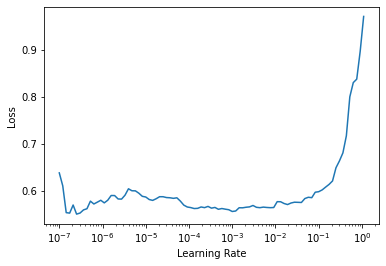

In [14]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100, 0.0001)

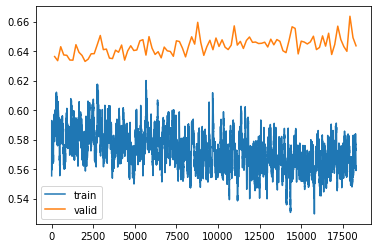

In [20]:
learn.recorder.plot_loss()

In [ ]:
learn.save('mini_train')
learn.export('export.pkl')